In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import joblib

import ipywidgets as widgets

In [43]:
#creating the dataframes
df1 = pd.read_csv('class.csv')
df2 = pd.read_csv('zoo.csv')
df3 = pd.read_csv('zoo2.csv')
df4 = pd.read_csv('zoo3.csv')

#combining all animals from all dataframes into 1 dataframe
all_animals = pd.concat([df2, df3, df4])

#mapping the class types from the class.csv to class types in all_animals
all_animals['class_type'] = all_animals['class_type'].map(df1.set_index('Class_Number')['Class_Type'])

#creating dataframe of only animal features without name or class type
animal_feat = pd.DataFrame(all_animals, columns=all_animals.columns[1:-1])

#getting all predators from list of animals
predators = all_animals[all_animals['predator'] == 1]


In [44]:
#spliting the data for training and testing
#X = animal_feat
#y = all_animals['class_type']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


In [45]:
#create model: random forest
#classifier = RandomForestClassifier()

In [46]:
#train model
#classifier.fit(X_train, y_train)

#exporting trained model into file
#joblib.dump(classifier, 'animal_type_predictor')

#importing trained model
classifier = joblib.load('animal_type_predictor')

#visualizing one of the decision trees within the randomforest classifiers
#tree.plot_tree(classifier.estimators_[2],
#                    feature_names=['hair', 'feathers', 'eggs', 'milk', 'airborne',
#                                  'aquatic', 'predator', 'toothed', 'backbone',
#                                  'breathes', 'venomous', 'fins', 'legs', 'tail',
#                                  'domestic', 'catsize'],
#                    class_names=sorted(y.unique()),
#                     label='all',
#                     rounded=True,
#                     filled=True)


In [47]:
#evaluate accuracy
classifier.score(X_test, y_test)


0.9767441860465116

Text(95.72222222222221, 0.5, 'Truth')

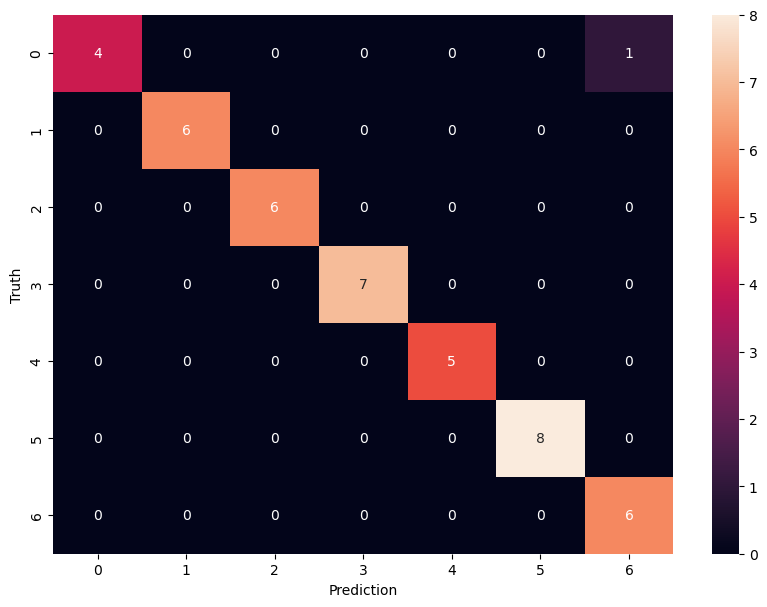

In [48]:
#evaluate model
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cm

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Amphibian       1.00      0.80      0.89         5
        Bird       1.00      1.00      1.00         6
         Bug       1.00      1.00      1.00         6
        Fish       1.00      1.00      1.00         7
Invertebrate       1.00      1.00      1.00         5
      Mammal       1.00      1.00      1.00         8
     Reptile       0.86      1.00      0.92         6

    accuracy                           0.98        43
   macro avg       0.98      0.97      0.97        43
weighted avg       0.98      0.98      0.98        43



<AxesSubplot:xlabel='class_type', ylabel='predator'>

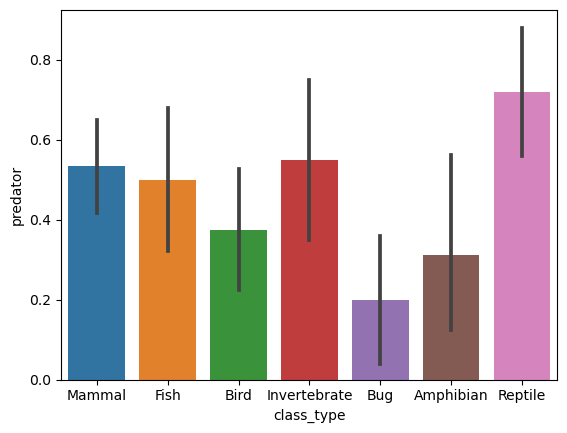

In [50]:
sns.barplot(x='class_type', y='predator', data = all_animals)

<AxesSubplot:xlabel='class_type', ylabel='count'>

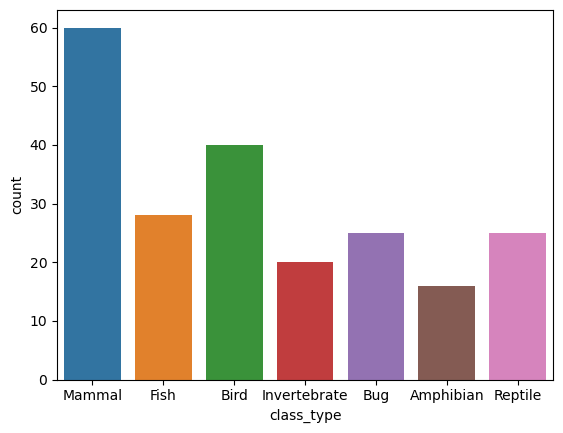

In [51]:
sns.countplot(x="class_type", data = all_animals)

<AxesSubplot:xlabel='class_type', ylabel='aquatic'>

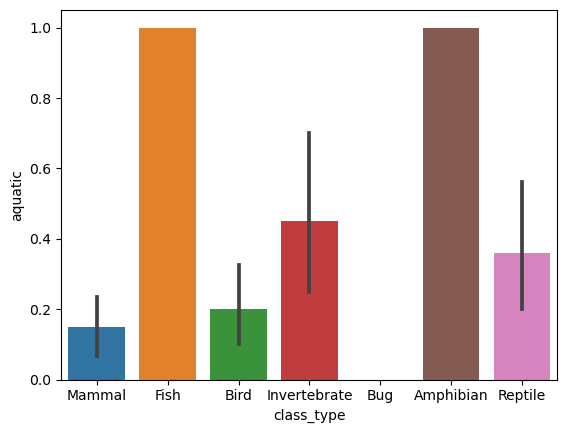

In [52]:
sns.barplot(x="class_type", y='aquatic', data=all_animals)

In [53]:
classifier.predict([[0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1]])


E:\Users\bthoe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Bird'], dtype=object)

In [54]:
data = ["Has Hair", "Has Feathers", "Produces Eggs", "Produces Milk", "Is Airborne", "Is Aquatic", "Is a Predator", "Has Teeth", "Has a Backbone", "Breathes", "Is Venomous", "Has Fins","Has Legs", "Has a Tail", "Is Domestic", "Is about the size of a feline"]

In [55]:
checkboxes = [widgets.Checkbox(
    value=False,
    description=label) for label in data]
output = widgets.VBox(children=checkboxes)

output


In [56]:
legs = widgets.IntSlider(
    value = 2,
    min = 0,
    max = 4,
    description="Legs")
legs

IntSlider(value=2, description='Legs', max=4)

In [57]:
def make_prediction(x):
    animal_features = []
    for i in range(0, len(checkboxes)):
        if checkboxes[i].description == "Has Legs":
            animal_features.append(legs.value)
        elif checkboxes[i].value == True:
            animal_features.append(1)
        else:
            animal_features.append(0)
    answer = classifier.predict([animal_features])
    print(answer[0])
make_prediction(1)

Invertebrate


E:\Users\bthoe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [58]:
button_predict = widgets.Button(
    description='Predict',
    disabled=False,
    button_style='success',
    tooltip='Makes a prediction',
    icon='check')
button_predict.on_click(make_prediction)
button_predict

Button(button_style='success', description='Predict', icon='check', style=ButtonStyle(), tooltip='Makes a pred…